### BRAINTELS LABS
ARTIFICIAL INTELLIGENCE , IMAGE PROCESSING & EMBEDDED SYSTEMS

##### TENSORBOARD & TENSORFLOW

**SUMMARY SCALAR** :
En este notebook se presenta como utilizar el summary protocol buffer denominado *scalar* . El scalar permite poder monitear metricas y visualizar funciones de costo que se utilizan en el entrenamiento de un modelo de aprendizaje automatico ,con el fin de tener un control sobre dichas variables aqui le presentamos como utilizar tensorboard para visualizar los valores de un tensor en forma grafica.

In [38]:
#importar 
import numpy as np
import tensorflow as tf

In [39]:
#deshabilitar modo eager
tf.compat.v1.disable_eager_execution()
#reiniciar grafo
tf.compat.v1.reset_default_graph()

*GRAFO COMPUTACIONAL*     

Y=X^2

X:Tensor de entrada

Y:Tensor de salida

In [36]:
#crear grafo computacional
braintels=tf.Graph()
#variables que representaran los valores minimo , maximo y el paso de un vector de entrada
xo,xf,step=-10,10,1
with braintels.as_default(): 
    #--Tensor variable X
    X=tf.compat.v1.get_variable(name="X",shape=(),initializer=tf.compat.v1.constant_initializer(xo))
    #---Tensor constante 
    st=tf.constant(step,dtype=tf.float32,name="st")
    #--Tensor de salida Y = X**2
    Y=tf.square(X,name="Y")
    #---Operación para actualizar la variable X => X=X+step 
    op=tf.compat.v1.assign_add(ref=X,value=st,name="op")
    #--- Summary scalar
    scalar=tf.compat.v1.summary.scalar("monitoreo_tensor_y",Y)

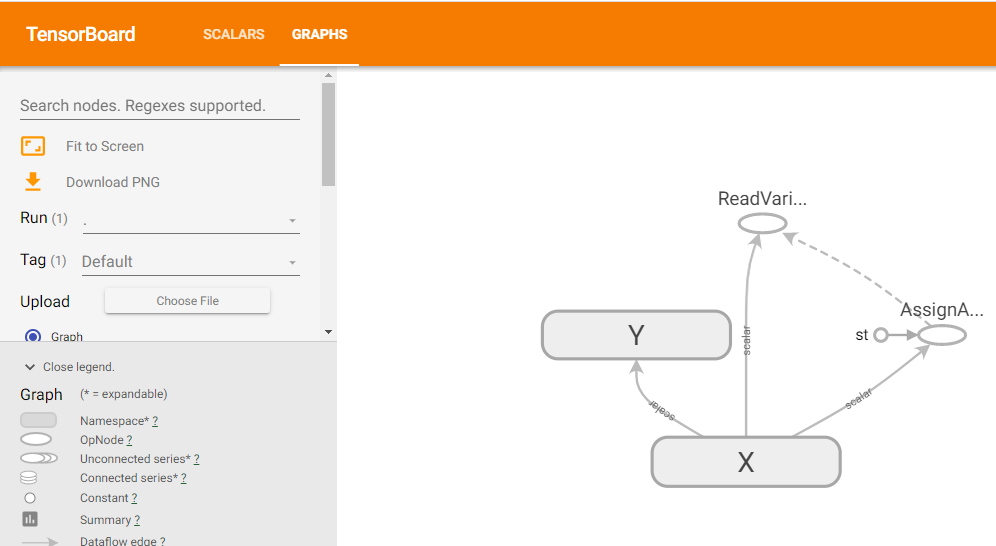

In [42]:
from IPython.display import Image
Image("scalar_grafo.png")

In [43]:
x=np.linspace(-4,4,20,dtype=np.float32)
#crear sesion 
with tf.compat.v1.Session(graph=braintels) as sesion:
    #crear objeto FileWriter
    writer=tf.compat.v1.summary.FileWriter("braintels_graph",graph=sesion.graph)
    #inicializar variable
    sesion.run(tf.compat.v1.global_variables_initializer())
    for i in range(xo,xf+step,step):
        #ejecutar el grafo computacional
        t=sesion.run(Y)
        #actualizar X
        sesion.run(op)
        #ejecutar el summary scalar
        summary=sesion.run(scalar)
        #agregar summary 
        writer.add_summary(summary,i)
    writer.close()
    
   
    

  

SUMMARY PROTOCOL BUFFER **SCALAR**

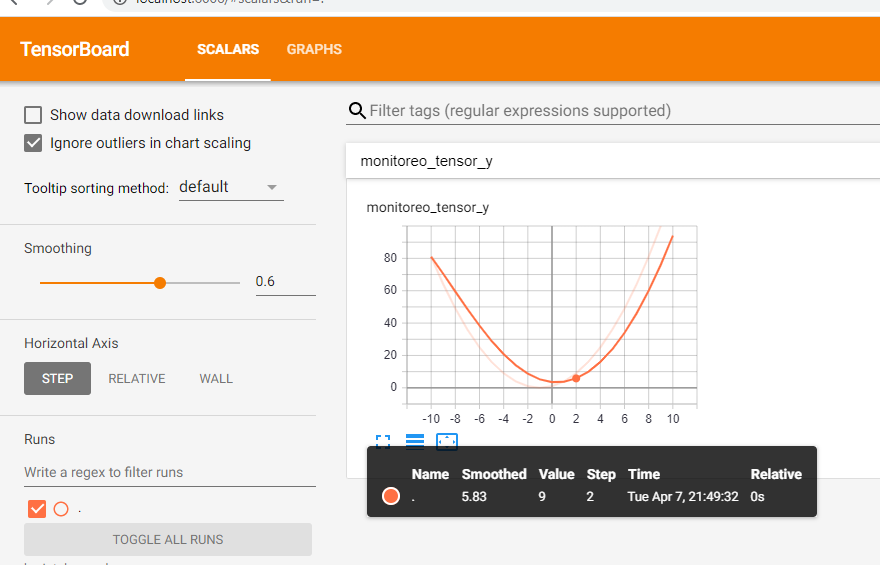

In [44]:
from IPython.display import Image
Image("scalar_grafico1.png")

### BRAINTELS LABS
ARTIFICIAL INTELLIGENCE , IMAGE PROCESSING & EMBEDDED SYSTEMS